In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1- Reading the Dataset**

In [4]:
file_path = "/kaggle/input/airline-data/airline - airline.csv.csv"
data = pd.read_csv(file_path)
data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


# **2- Exploring the Data**

In [5]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 129880
Number of columns: 24


In [6]:
# Get a list of columns and their data types
data.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [8]:
# Check for missing values in each column
data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [9]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

Number of duplicate records: 0


In [10]:
# Generate descriptive statistics
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
# List of categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns

# Print the value counts for each categorical variable
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())
    print("\n")


Value counts for Gender:
Gender
Female    65899
Male      63981
Name: count, dtype: int64


Value counts for Customer Type:
Customer Type
Returning     106100
First-time     23780
Name: count, dtype: int64


Value counts for Type of Travel:
Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64


Value counts for Class:
Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64


Value counts for Satisfaction:
Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64




# **3- Handling Missing Values**

In [17]:
# Calculate the median of 'Arrival Delay' without missing values
median_arrival_delay = data['Arrival Delay'].median()

# Use a more direct assignment method to fill missing values
data.loc[:, 'Arrival Delay'] = data['Arrival Delay'].fillna(median_arrival_delay)

print(data['Arrival Delay'].isnull().sum()) 

0


In [21]:
data['Arrival Delay'] = data['Arrival Delay'].astype(int)

In [20]:
data['Arrival Delay'].dtypes

dtype('int64')

# **4- Handling Outliers**

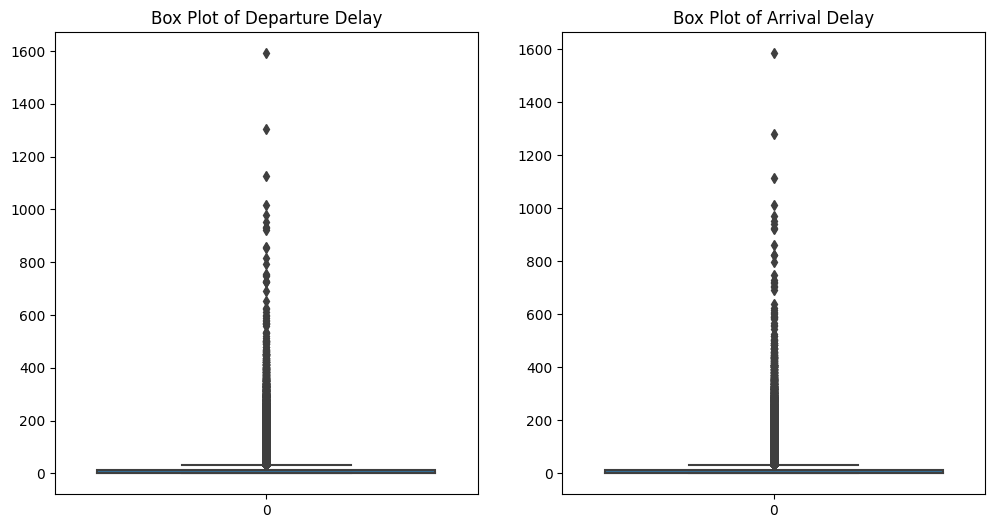

In [22]:
# Setting up the plotting environment
plt.figure(figsize=(12, 6))

# Creating a subplot for 'Departure Delay'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.boxplot(data['Departure Delay'])
plt.title('Box Plot of Departure Delay')

# Creating a subplot for 'Arrival Delay'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(data['Arrival Delay'])
plt.title('Box Plot of Arrival Delay')

# Display the plots
plt.show()


In [26]:
# Filter data to include only numerical columns for the IQR calculation
numerical_data = data.select_dtypes(include=['int64'])

# Calculate the IQR for numerical columns, specifically 'Departure Delay' and 'Arrival Delay'
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for outliers specifically for delay columns
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and optionally filter out outliers for 'Departure Delay' and 'Arrival Delay'
is_not_outlier = (
    (data['Departure Delay'] >= lower_bound['Departure Delay']) &
    (data['Departure Delay'] <= upper_bound['Departure Delay']) &
    (data['Arrival Delay'] >= lower_bound['Arrival Delay']) &
    (data['Arrival Delay'] <= upper_bound['Arrival Delay'])
)

# Apply the filter to the data
cleaned_data = data[is_not_outlier]

print("Data shape after removing outliers:", cleaned_data.shape)

Data shape after removing outliers: (109068, 24)


In [24]:
cleaned_data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,3,Male,41,Returning,Business,Business,853,0,0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,129875,Female,55,Returning,Personal,Economy Plus,308,0,0,4,...,4,3,3,4,2,4,3,4,4,Neutral or Dissatisfied
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied


In [28]:
# Save the cleaned data to a new CSV file
cleaned_data.to_csv('cleaned_data.csv', index=False)